# Speed Dating ❤️❤️❤️

## Challenge description

 We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.
***

In [24]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']
df = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")
speed_dating_df = df[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
speed_dating_df.head(5)

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


## 🔍 Who is participating to this speed dating event ? - Exploratory Data Analysis 🔍

---

Let's explore the dataset in terms of defining features that describe the participants.
Age, gender, race, field of study, and more will be explored here. \
We know that these events were dedicated to **partners of the *opposite* gender**. \
In this intance, we have a dataset composed of :

In [26]:
speed_dating_df['gender'] = speed_dating_df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(speed_dating_df.gender)
speed_dating_df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

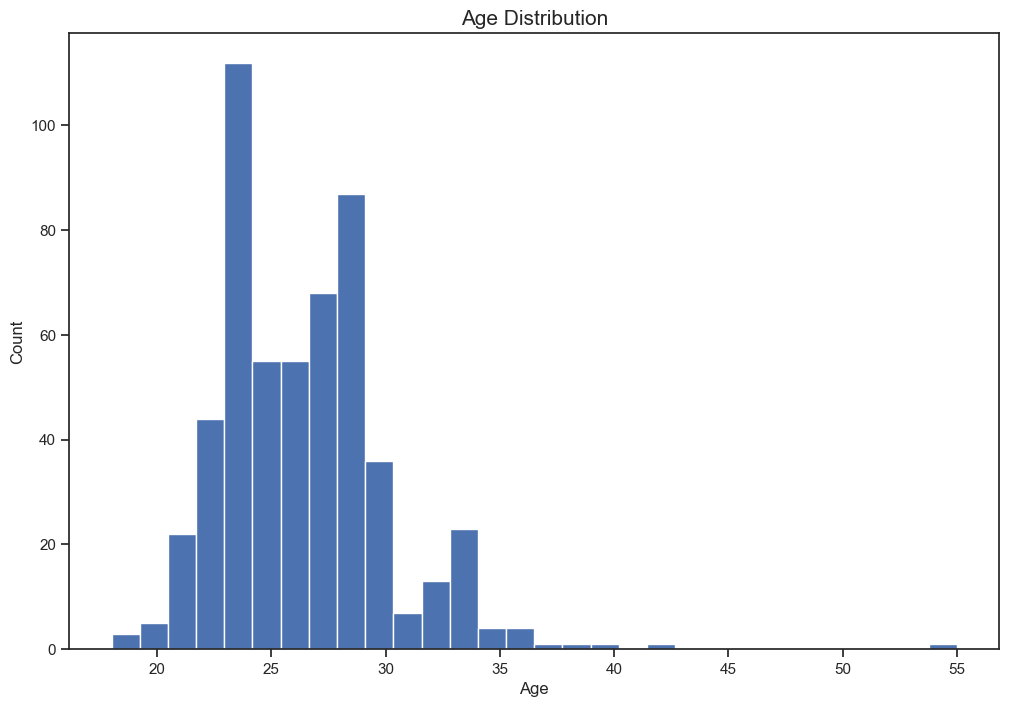

In [27]:
ax = speed_dating_df.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

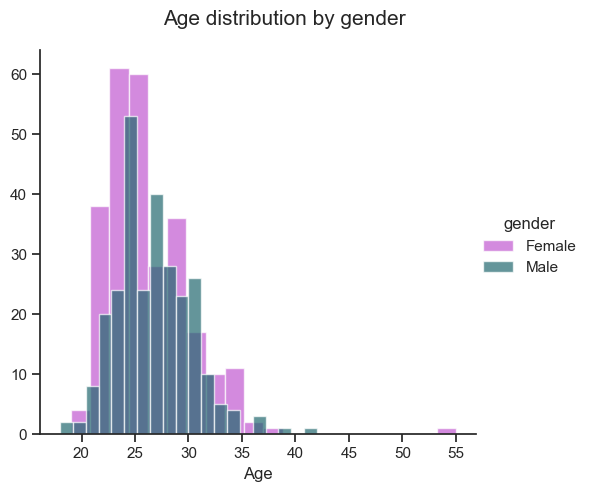

In [28]:
g = sns.FacetGrid(speed_dating_df, hue='gender', height = 5, palette=['#C159D1','#236970'])
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

In [29]:
speed_dating_df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

<AxesSubplot:ylabel='field_cd'>

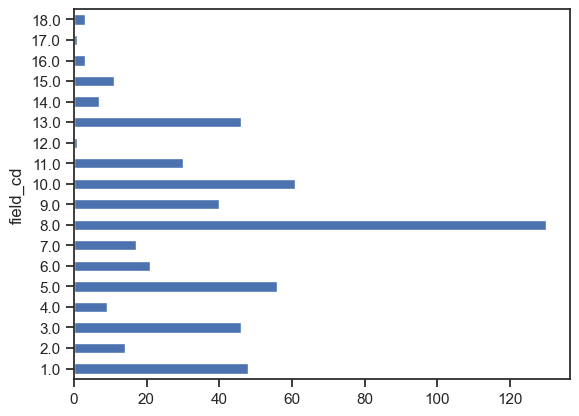

In [30]:
speed_dating_df.groupby("field_cd").size().plot(kind="barh")

<AxesSubplot:ylabel='career_c'>

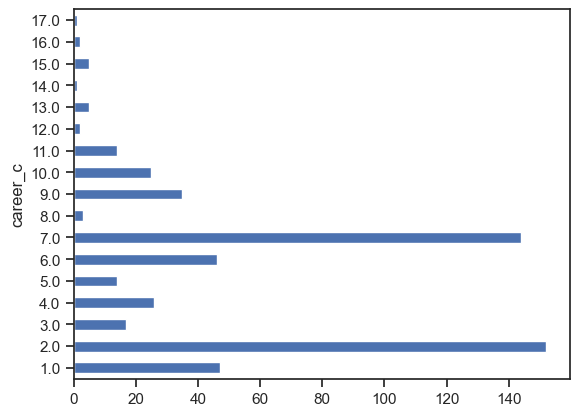

In [31]:
speed_dating_df.groupby("career_c").size().plot(kind="barh")

<AxesSubplot:ylabel='imprace'>

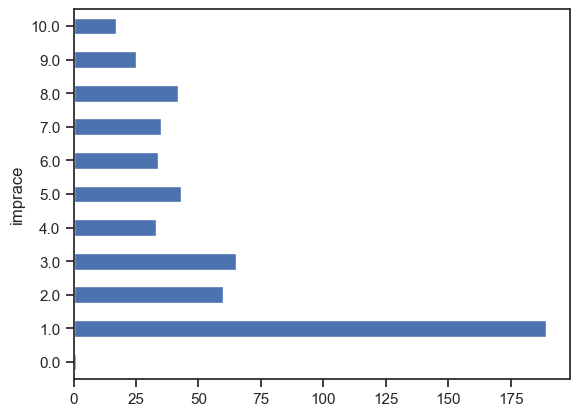

In [32]:
speed_dating_df.groupby("imprace").size().plot(kind="barh")

In [33]:
speed_dating_df['race'] = speed_dating_df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(speed_dating_df.race)
#df_full['race'] = df_full.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
#                          4: 'Asian', 6: 'Other'}).fillna(df_full.race)
#df_full['race_o'] = df_full.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
#                          4: 'Asian', 6: 'Other'}).fillna(df_full.race_o)
speed_dating_df.race.value_counts(dropna=False)

White       304
Asian       136
Hispanic     42
Other        37
Black        26
NaN           6
Name: race, dtype: int64

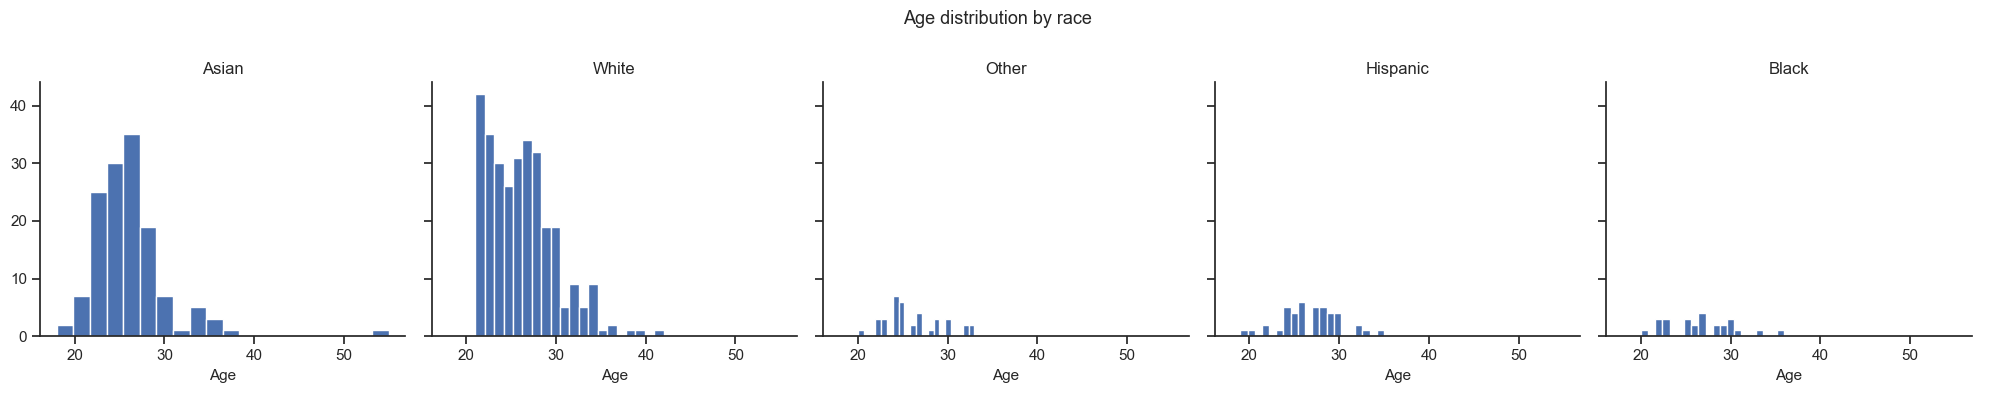

In [34]:
g = sns.FacetGrid(speed_dating_df, col='race', height=4)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [35]:
speed_dating_df.isnull().sum()

iid           0
wave          0
gender        0
age           8
field         6
field_cd      7
undergra    236
mn_sat      349
tuition     317
race          6
imprace       7
imprelig      7
from          7
zipcode      76
income      270
goal          7
date          8
go_out        7
career        8
career_c     12
sports        7
tvsports      7
exercise      7
dining        7
museums       7
art           7
hiking        7
gaming        7
clubbing      7
reading       7
tv            7
theater       7
movies        7
concerts      7
music         7
shopping      7
yoga          7
exphappy      8
expnum      425
match_es     72
satis_2      66
length       66
numdat_2     69
you_call    288
them_cal    288
date_3      288
numdat_3    458
num_in_3    511
dtype: int64

Text(0, 0.5, 'Frequency')

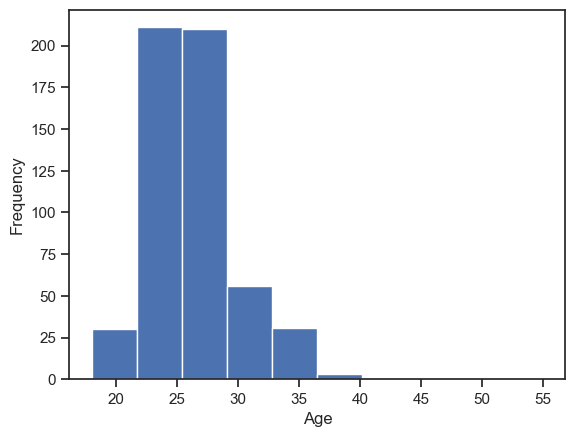

In [36]:
# age distribution of participants
age = speed_dating_df[np.isfinite(speed_dating_df['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [43]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=speed_dating_df['match'],columns="count")

KeyError: 'match'

In [38]:
# narrowing dataset
dating_1 = speed_dating_df.iloc[:, 11:28]
dating_2 = speed_dating_df.iloc[:, 30:35]
dating_3 = speed_dating_df.iloc[:, 39:43]
dating_4 = speed_dating_df.iloc[:, 45:67]
dating_5 = speed_dating_df.iloc[:, 69:74]
dating_6 = speed_dating_df.iloc[:, 87:91]
dating_7 = speed_dating_df.iloc[:, 97:102]
dating_8 = speed_dating_df.iloc[:, 104:107]

date = pd.concat([speed_dating_df.iloc[:, 0],speed_dating_df.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [39]:
# counting null values
date.isnull().sum()

iid           0
gender        0
imprelig      7
from          7
zipcode      76
income      270
goal          7
date          8
go_out        7
career        8
career_c     12
sports        7
tvsports      7
exercise      7
dining        7
museums       7
art           7
hiking        7
gaming        7
tv            7
theater       7
movies        7
concerts      7
music         7
match_es     72
satis_2      66
length       66
numdat_2     69
date_3      288
numdat_3    458
num_in_3    511
dtype: int64

In [40]:
# removing null rows now that the nulls are in the hundreds and not the thousands
date2 = date.dropna()

In [41]:
# checking datatypes
date22 = date2.dtypes
date23 = [x for x in date22 if x == "object"]
print(date22)

iid           int64
gender       object
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
match_es    float64
satis_2     float64
length      float64
numdat_2    float64
date_3      float64
numdat_3    float64
num_in_3    float64
dtype: object


In [42]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

KeyError: "['field'] not found in axis"

<AxesSubplot:title={'center':'Correlation Heatmap'}>

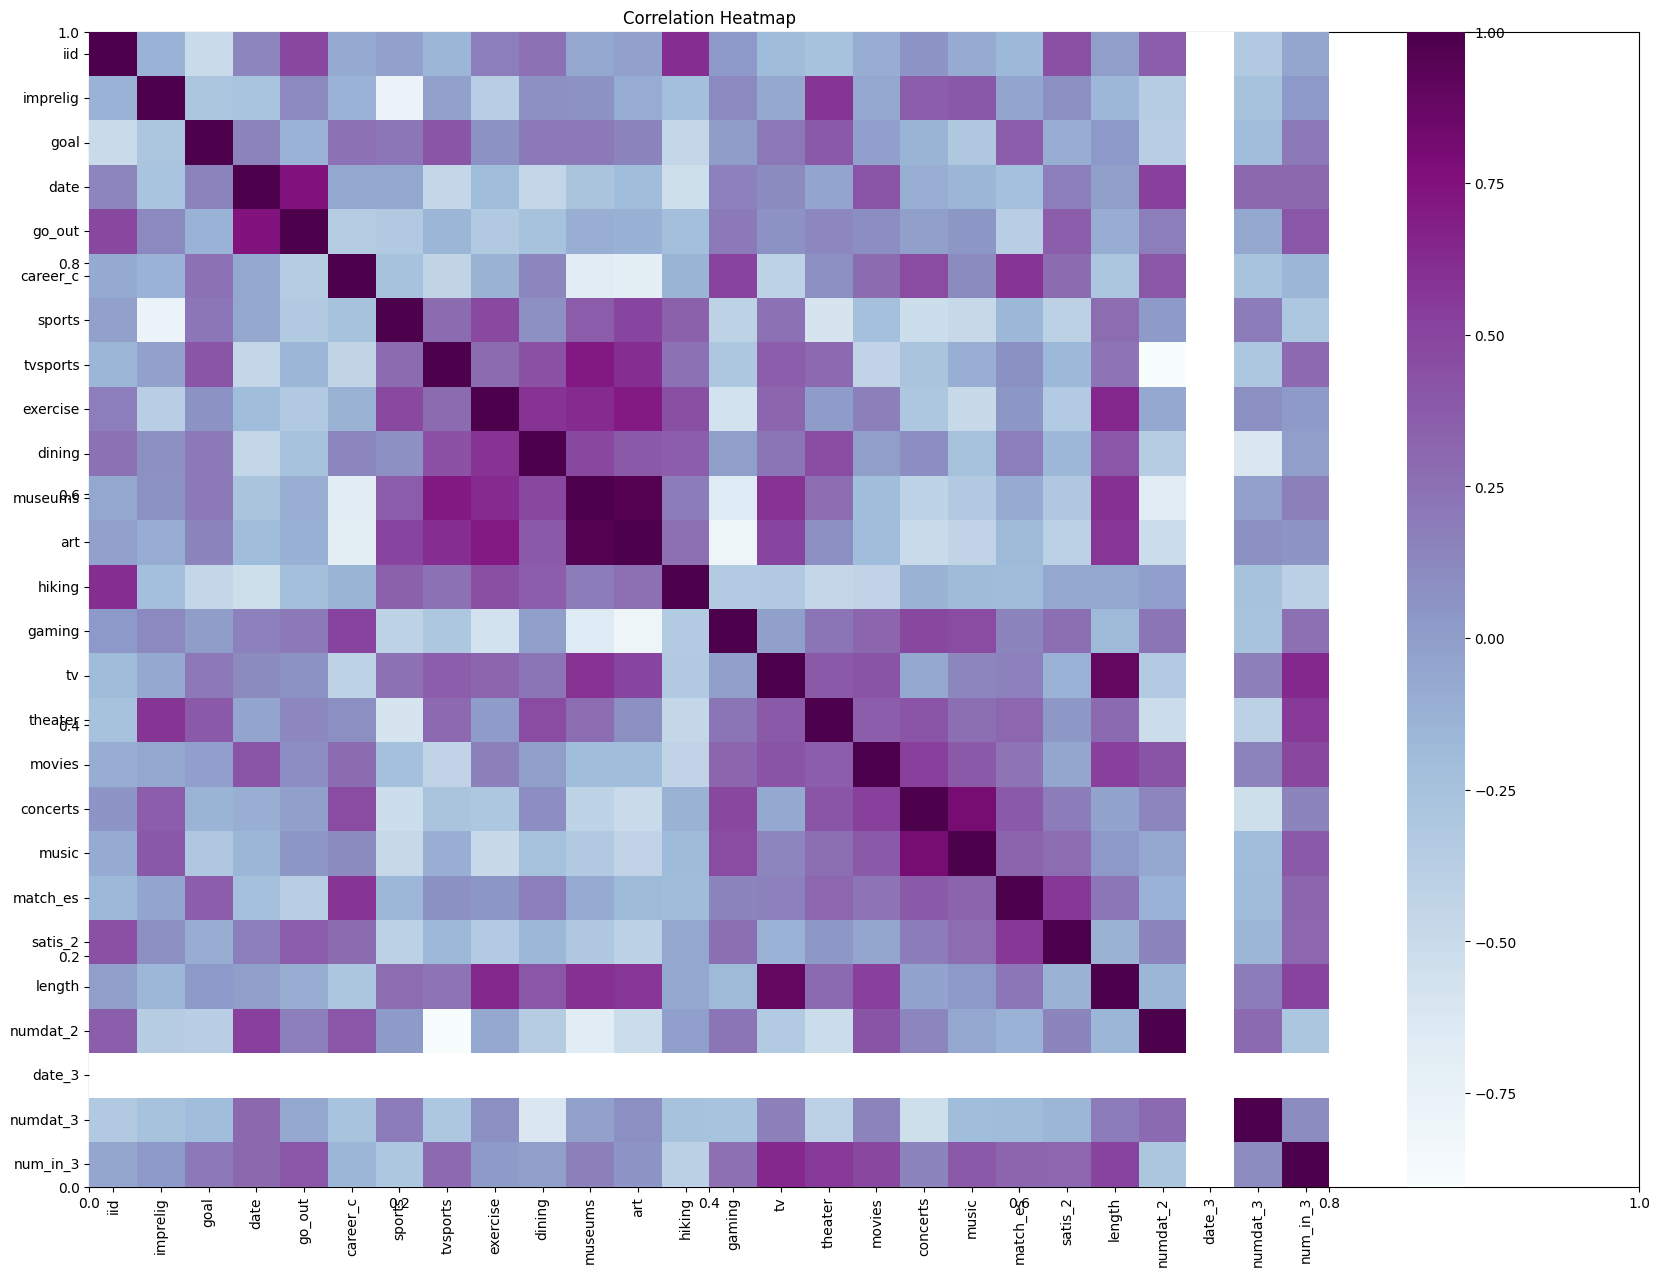

In [ ]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="BuPu")

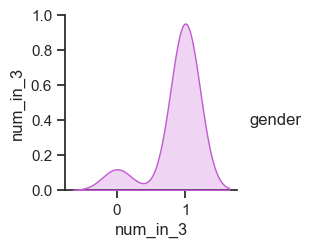

In [ ]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:33]],axis = 1)
g = sns.pairplot(date_int, hue="gender", palette=['#C159D1','#236970'])

In [ ]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender", palette=['#C159D1','#236970'])

ValueError: No variables found for grid columns.

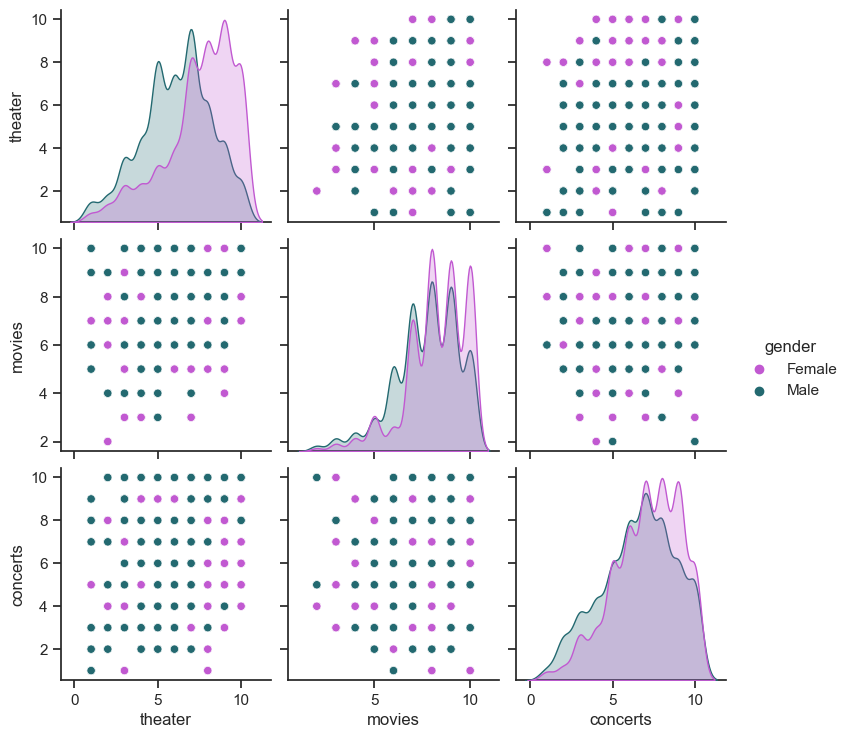

In [ ]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender", palette=['#C159D1','#236970'])